In [515]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis 

from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett 

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import time

# charger le modèle:

In [2]:
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/bge-m3-zeroshot-v2.0", use_safetensors=False)

Device set to use cpu


In [ ]:
def labeliser(df,labels):
  sp=df.host_about
  res_df=pd.DataFrame()

  for i, sp in enumerate(sp):#test
    output = classifier(sp, labels, multi_label=True)

    res_courant={'sp':sp}
    labels_scores=dict(zip(output['labels'],output['scores']))
    for lab in labels :
      if lab not in res_courant:
        res_courant[lab]=labels_scores[lab]

    res_courant=pd.DataFrame(res_courant, index=[i])
    res_df=pd.concat([res_df,res_courant])

  return res_df

# zsc sur EN:

In [ ]:
listings_en=pd.read_csv('/content/drive/My Drive/tactiques2/data/listings_en-others_unique.csv', sep=',', on_bad_lines='skip', encoding='utf-8')
listings_en=listings_en.dropna(subset=['host_about'])
print(len(listings_en))
print('host_about EN:', listings_en.host_about[:5])

In [1]:
labels_en=[
    'open to different cultures', 'cosmopolitan','international view', 'cultural exchange', 
    'personal life', 'life experiences', 'divers interests', 'hobbies', 'enjoy life',
    'meet new people', 'welcoming', 'friendly', 'sociable', 'interpersonal interaction', 
    'thoughtful service', 'attentive to needs', 'willing to help', 'responsive', 
    'fan of Airbnb', 'Airbnb community','love Airbnb', 'travel with Airbnb'
]
print(len(labels_en))

22


In [ ]:
#TEST：
n=10
res_df=labeliser(listings_en[:n],labels_en)
#stocker:
#output_path=f'/content/drive/My Drive/tactiques2/result/result_test_en{n}.csv'
#res_df.to_csv(output_path, index=False)
for i in range (n):
  print(f'{i} text : {res_df.sp[i]}\n')

In [ ]:
res_df

In [ ]:
#APPLICATION :
start_time=time.time()
res_df=labeliser(listings_en,labels_en)
#print(res_df.head())
#stocker
output_path='/content/drive/My Drive/tactiques2/result/result_en.csv'
res_df.to_csv(output_path, index=False)
end_time=time.time()
print('time:', end_time-start_time)
res_df.head()

# zsc sur FR:

In [4]:
##version1:
labels_fr=[
        'ouvert aux différentes cultures', 'cosmopolite','vue internationale', 'échange culturel', 
        'vie personnelle', 'parcours personnel', 'loisirs', 'passions', 'aimer la vie',
       'rencontrer de nouvelles personnes', 'accueillant', 'amical','sociable', 'interaction interpersonnelle', 
       'rendre service','attentif aux besoins', 'prêt à aider', 'réactif',
       "adepte d'Airbnb",'communauté Airbnb', 'aime Airbnb', 'voyager par Airbnb'
       ]
print(len(labels_fr))

22


In [ ]:
listings_fr=pd.read_csv('/content/drive/My Drive/tactiques2/data/listings_fr_unique.csv', sep=',', on_bad_lines='skip', encoding='utf-8')
listings_fr=listings_fr.dropna(subset=['host_about'])
print('nb entrées :',len(listings_fr))
print('host_about FR:', listings_fr.host_about.head())

In [ ]:
#TEST：
n=10
res_df=labeliser(listings_fr[:n],labels_fr)
#stocker:
output_path=f'/content/drive/My Drive/tactiques2/result/result_test_fr{n}.csv'
res_df.to_csv(output_path, index=False)

In [ ]:
#APPLICATION :
start_time=time.time()
res_df=labeliser(listings_en,labels_en)
#print(res_df.head())
#stocker
output_path='/content/drive/My Drive/tactiques2/result/result_fr.csv'
res_df.to_csv(output_path, index=False)
end_time=time.time()
print('time:', end_time-start_time)
res_df.head()

# combiner les labels en et fr :

In [516]:
res_en=pd.read_csv('D:/Master_ENC/mini_memoire/res_tactiques2/result_en5.csv',sep=',', on_bad_lines='skip', encoding='utf-8')
res_fr=pd.read_csv('D:/Master_ENC/mini_memoire/res_tactiques2/result_fr5.csv',sep=',', on_bad_lines='skip', encoding='utf-8')

In [517]:
#remplacer les noms fr par noms anglais
fr2en=dict(zip(res_fr.columns, res_en.columns))
print(fr2en)
print(len(fr2en))
res_fr.rename(columns=fr2en, inplace=True)
#print(res_fr.columns)

#combiner les résultat fr et en：
print(len(res_en), len(res_fr))
res=pd.concat([res_en, res_fr], axis=0)
print(len(res))

{'sp': 'sp', 'ouvert aux différentes cultures': 'open to different cultures', 'cosmopolite': 'cosmopolitan', 'vue internationale': 'international view', 'échange culturel': 'cultural exchange', 'vie personnelle': 'personal life', 'parcours personnel': 'life experiences', 'loisirs': 'divers interests', 'passions': 'hobbies', 'aimer la vie': 'enjoy life', 'rencontrer de nouvelles personnes': 'meet new people', 'accueillant': 'welcoming', 'amical': 'friendly', 'sociable': 'sociable', 'interaction interpersonnelle': 'interpersonal interaction', 'rendre service': 'thoughtful service', 'attentif aux besoins': 'attentive to needs', 'prêt à aider': 'willing to help', 'réactif': 'responsive', 'emplacement central': 'central location', 'près des sites touristiques': 'close to attraction', 'près des restaurants': 'close to restaurants', 'proche des transports': 'close to transport connections', 'quartier animé': 'lively neighborhood', 'bien équipé': 'well-equipped', 'belle décoration': 'well-deco

In [518]:
res=res[['sp','open to different cultures', 'cosmopolitan','international view', 'cultural exchange', 
         'personal life','life experiences', 'divers interests', 'hobbies', 'enjoy life',
       'meet new people', 'welcoming', 'friendly', 'sociable','interpersonal interaction', 
       'thoughtful service', 'attentive to needs', 'willing to help', 'responsive',
       'fan of Airbnb', 'Airbnb community','love Airbnb', 'travel with Airbnb']]
print(res.columns)
print(len(res.columns))


Index(['sp', 'open to different cultures', 'cosmopolitan',
       'international view', 'cultural exchange', 'personal life',
       'life experiences', 'divers interests', 'hobbies', 'enjoy life',
       'meet new people', 'welcoming', 'friendly', 'sociable',
       'interpersonal interaction', 'thoughtful service', 'attentive to needs',
       'willing to help', 'responsive', 'fan of Airbnb', 'Airbnb community',
       'love Airbnb', 'travel with Airbnb'],
      dtype='object')
23


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'open to different cultures'),
  Text(1, 0, 'cosmopolitan'),
  Text(2, 0, 'international view'),
  Text(3, 0, 'cultural exchange'),
  Text(4, 0, 'personal life'),
  Text(5, 0, 'life experiences'),
  Text(6, 0, 'divers interests'),
  Text(7, 0, 'hobbies'),
  Text(8, 0, 'enjoy life'),
  Text(9, 0, 'meet new people'),
  Text(10, 0, 'welcoming'),
  Text(11, 0, 'friendly'),
  Text(12, 0, 'sociable'),
  Text(13, 0, 'interpersonal interaction'),
  Text(14, 0, 'thoughtful service'),
  Text(15, 0, 'attentive to needs'),
  Text(16, 0, 'willing to help'),
  Text(17, 0, 'responsive'),
  Text(18, 0, 'fan of Airbnb'),
  Text(19, 0, 'Airbnb community'),
  Text(20, 0, 'love Airbnb'),
  Text(21, 0, 'travel with Airbnb')])

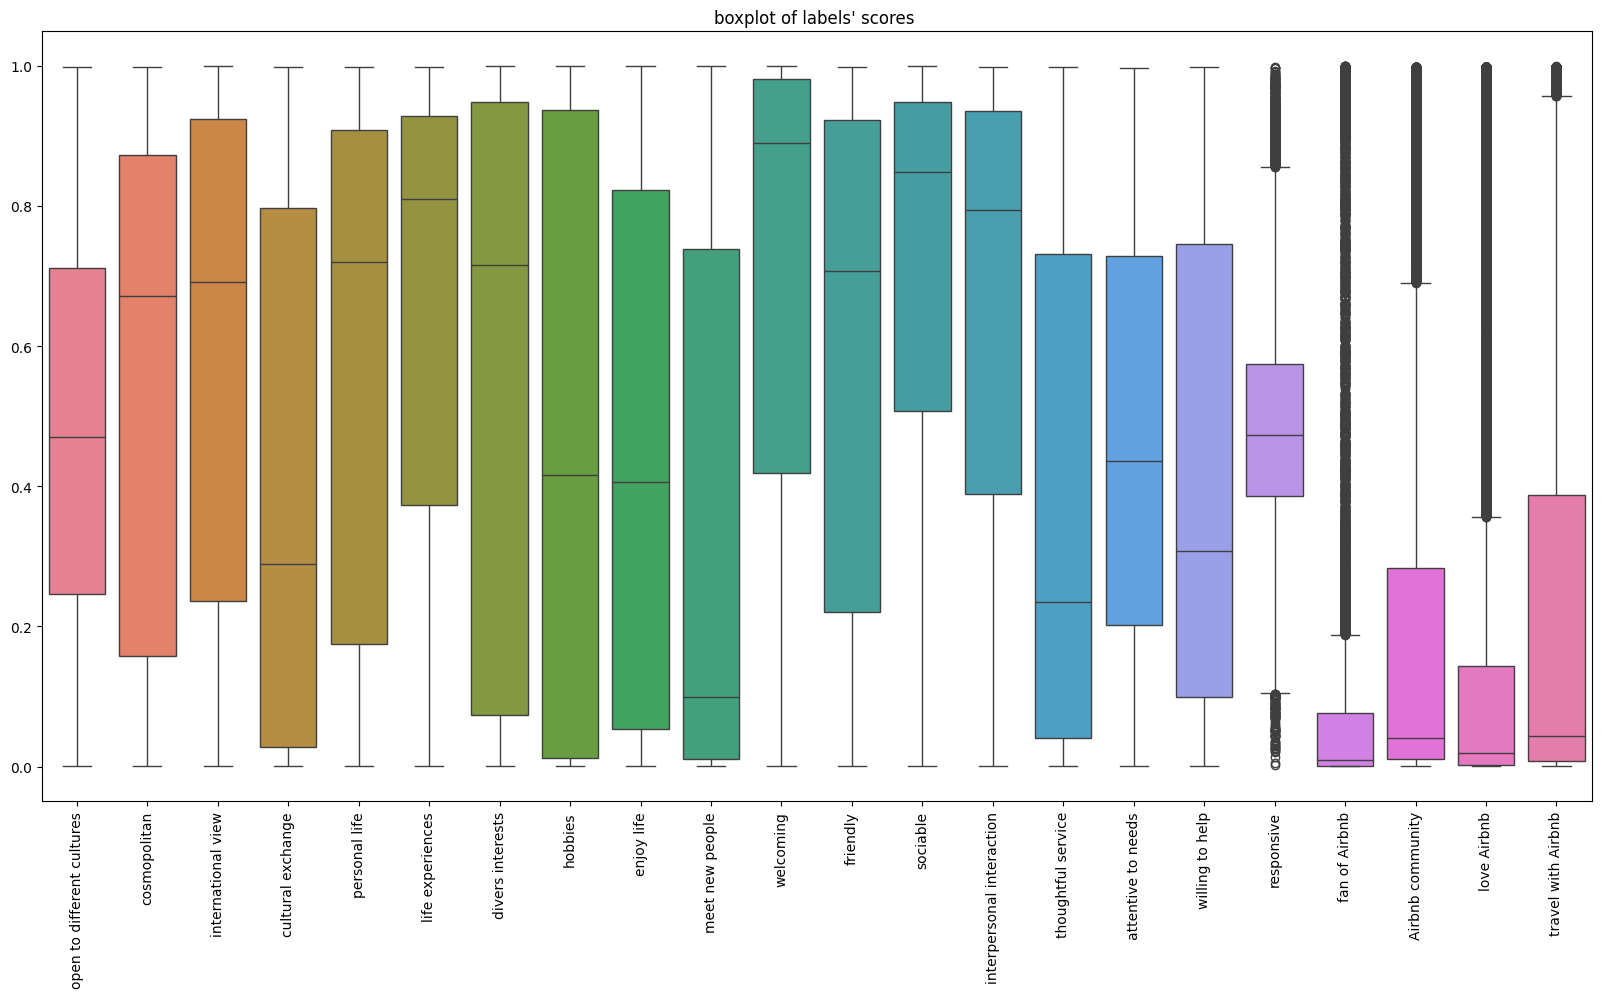

In [519]:
import matplotlib.pyplot as plt
import seaborn as sns
data=res.drop(columns='sp')
plt.figure(figsize=(20,10))
sns.boxplot(data)
plt.title("boxplot of labels' scores ")
plt.xticks(rotation=90)

In [520]:
res.to_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/result_zsc_tactics7.csv', index=False)

## Retourner sur la dataset originale:

In [521]:
##LISTINGS
listings=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics2.csv', sep=',', on_bad_lines='skip', encoding='utf-8')
cols=listings.columns[-31:-1]
listings=listings.drop(columns=cols)
print(len(listings))
print('LISTINGS:',listings.columns[-30:])

74329
LISTINGS: Index(['instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_gender_1', 'host_gender_2', 'host_class', 'host_class_',
       'host_annais_1', 'host_annais_2', 'age', 'langue', 'len', 'i', 'we',
       'P1_obj', 'P1', 'P2', 'P3', 'i_rel', 'we_rel', 'P1_rel', 'P2_rel',
       'P3_rel', 'langue_', 'price_', 'booking_rate_l30d', 'property_type_'],
      dtype='object')


In [ ]:
##nombre de mot：
listings["len_squared"] = listings["len"] ** 2
print(listings.len.describe(include='all'))

# professionalisme :
listings['professional_host']=listings['calculated_host_listings_count'].apply(lambda x: 't' if x>1 else 'f')
print(listings.professional_host.value_counts()/len(listings))


count    74329.000000
mean        34.815146
std         77.492735
min          0.000000
25%          0.000000
50%          0.000000
75%         39.000000
max       1124.000000
Name: len, dtype: float64


In [523]:
#TACTICS
cols_labels=['open to different cultures', 'cosmopolitan',
       'international view', 'cultural exchange', 'personal life',
       'life experiences', 'divers interests', 'hobbies', 'enjoy life',
       'meet new people', 'welcoming', 'friendly', 'sociable',
       'interpersonal interaction', 'thoughtful service', 'attentive to needs',
       'willing to help', 'responsive', 'fan of Airbnb', 'Airbnb community',
       'love Airbnb', 'travel with Airbnb']
cols=['sp']+cols_labels

res_zsc_tactics=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/result_zsc_tactics7.csv')
res_zsc_tactics=res_zsc_tactics[cols]
print(res_zsc_tactics.columns)

Index(['sp', 'open to different cultures', 'cosmopolitan',
       'international view', 'cultural exchange', 'personal life',
       'life experiences', 'divers interests', 'hobbies', 'enjoy life',
       'meet new people', 'welcoming', 'friendly', 'sociable',
       'interpersonal interaction', 'thoughtful service', 'attentive to needs',
       'willing to help', 'responsive', 'fan of Airbnb', 'Airbnb community',
       'love Airbnb', 'travel with Airbnb'],
      dtype='object')


In [524]:
listings_tactics=listings.merge(res_zsc_tactics, left_on='host_about', right_on='sp', how='left')
listings_tactics.drop(columns='sp', inplace=True)
print(listings_tactics.columns)
print(len(listings_tactics))

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       ...
       'sociable', 'interpersonal interaction', 'thoughtful service',
       'attentive to needs', 'willing to help', 'responsive', 'fan of Airbnb',
       'Airbnb community', 'love Airbnb', 'travel with Airbnb'],
      dtype='object', length=126)
74329


# filtrer la dataset:

In [525]:
listings=listings_tactics.copy()

listings['booking_rate_l30d'] = listings.apply(
    lambda row: min(row['number_of_reviews_l30d'] / row['availability_30'], 1.0) 
    if row['availability_30'] > 0 else None, 
    axis=1
)

In [526]:
##【filtrage】booking_rate:!=0
listings=listings[listings['booking_rate_l30d'].notna()]
print('booking_rate notna LEN:',len(listings))
print(listings.booking_rate_l30d.describe(include='all'))
# display(listings.head())

booking_rate notna LEN: 37587
count    37587.000000
mean         0.083684
std          0.206268
min          0.000000
25%          0.000000
50%          0.000000
75%          0.055556
max          1.000000
Name: booking_rate_l30d, dtype: float64


In [527]:
# #price：
print(listings.price_.notna().value_counts()/len(listings)) #price中有1%,573条为nan:忽略
print(listings.price_.describe(include='all')) #mean:232.954125
listings=listings[listings["price_"].notna()]
print("len listings of price_ notna:",len(listings),'\n')#37014

price_
True     0.984755
False    0.015245
Name: count, dtype: float64
count    37014.000000
mean       232.954125
std        671.684158
min         10.000000
25%         98.000000
50%        141.000000
75%        225.000000
max      84420.000000
Name: price_, dtype: float64
len listings of price_ notna: 37014 



In [528]:
#review :
print(listings.review_scores_rating.notna().value_counts()/len(listings))#19%nan，选择填充为mean:4.68
print('review :',listings.review_scores_rating.describe(include='all'),'\n')

listings['review_scores_rating']=listings['review_scores_rating'].fillna(4.68)
print(listings.review_scores_rating.notna().value_counts()/len(listings),)#检查是否nan:True    1.0
print(listings.review_scores_rating.describe(include='all'),'\n')#检查填充后的mean: 4.684096 无变化

review_scores_rating
True     0.801967
False    0.198033
Name: count, dtype: float64
review : count    29684.000000
mean         4.689297
std          0.428456
min          0.000000
25%          4.570000
50%          4.810000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64 

review_scores_rating
True    1.0
Name: count, dtype: float64
count    37014.000000
mean         4.687456
std          0.383710
min          0.000000
25%          4.660000
50%          4.710000
75%          4.930000
max          5.000000
Name: review_scores_rating, dtype: float64 



In [494]:
# listings.to_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics8.csv',index=False)

# vérifier EFA, cronbach alpha, fusionner des labels en tactiques :

In [529]:
cols_labels=['open to different cultures', 'cosmopolitan', 'international view','cultural exchange',
                       'personal life', 'life experiences','divers interests', 'hobbies', 'enjoy life', 
                    'meet new people', 'welcoming', 'friendly', 'sociable', 'interpersonal interaction',
                     'thoughtful service', 'attentive to needs', 'willing to help','responsive', 
                     'fan of Airbnb', 'Airbnb community', 'love Airbnb','travel with Airbnb']


In [530]:
#DATA:
df=listings.dropna(subset='host_about').drop_duplicates(subset='host_about')
# df=df.drop(columns=cols_tactics)##df无原来的tactics数值，无items值均为0，无重复！

print(len(df))
print(df.columns[-20:])
print(df[cols_labels].notna().value_counts())
# display(df.head())

9586
Index(['international view', 'cultural exchange', 'personal life',
       'life experiences', 'divers interests', 'hobbies', 'enjoy life',
       'meet new people', 'welcoming', 'friendly', 'sociable',
       'interpersonal interaction', 'thoughtful service', 'attentive to needs',
       'willing to help', 'responsive', 'fan of Airbnb', 'Airbnb community',
       'love Airbnb', 'travel with Airbnb'],
      dtype='object')
open to different cultures  cosmopolitan  international view  cultural exchange  personal life  life experiences  divers interests  hobbies  enjoy life  meet new people  welcoming  friendly  sociable  interpersonal interaction  thoughtful service  attentive to needs  willing to help  responsive  fan of Airbnb  Airbnb community  love Airbnb  travel with Airbnb
True                        True          True                True               True           True              True              True     True        True             True       True      True      True  

d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


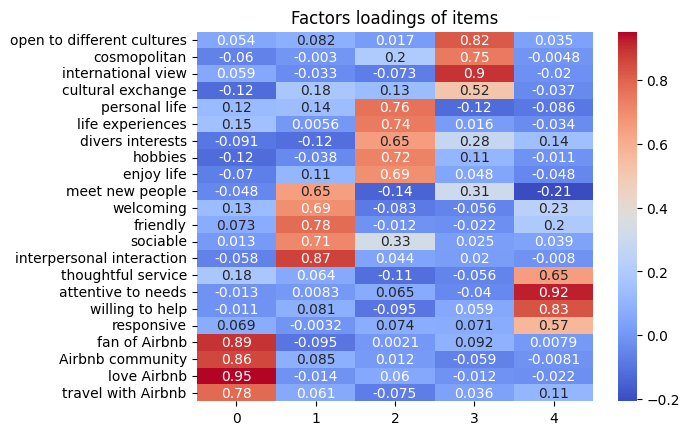

d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(9586, 5)
[[-0.31202984 -0.52321047  0.85436451 -0.48918383  0.59229531]
 [-0.64912063 -2.01052685 -1.10227464 -1.12828869 -1.18850109]
 [ 0.92468314 -0.85334736  0.47231417  0.01263521 -0.35991298]
 ...
 [ 2.93067343  0.23219495 -0.30334406 -1.23880023  1.78500329]
 [ 2.93096733  0.25667984 -0.28037349 -1.24647565  1.77496398]
 [ 1.28284832 -0.28922995  0.16565856  0.78170825  1.53833464]]


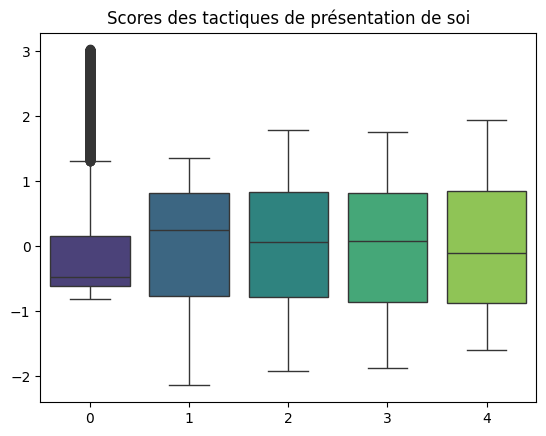

In [ ]:
from factor_analyzer import FactorAnalyzer
#FIT:
data=df[cols_labels]
fa = FactorAnalyzer(n_factors=5, rotation='oblimin', method='minres')
fa.fit(data)

##LOADINGS :
loadings = fa.loadings_

loadings_df=pd.DataFrame(loadings, index=data.columns)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Factors loadings of items')
plt.show()

##SCORES:# 得到因子得分（每个策略每个样本一个分数）
scores = fa.transform(data)#efa是无监督学习,自己发现潜在结构!
print(scores.shape)
print(scores)#每个房东在 5 个潜在因子（也就是你定义的 5 个策略）上的得分。


sns.boxplot(scores, palette='viridis')
plt.title('Scores des tactiques de présentation de soi')
plt.show()


In [532]:
labels2tac={
    "openness":['open to different cultures','cosmopolitan','international view','cultural exchange'], 
    "authenticity":['personal life','life experiences','divers interests','hobbies','enjoy life'], 
    'sociability':['meet new people', 'welcoming', 'friendly','sociable', 'interpersonal interaction',],
    'self_promotion':['thoughtful service', 'attentive to needs','willing to help','responsive'],
    'exemplification':["fan of Airbnb","Airbnb community",'love Airbnb', 'travel with Airbnb']    
}    

from pingouin import cronbach_alpha

print(len(data))
for tactic, labels in labels2tac.items():
    alpha, _ = cronbach_alpha(data[labels])
    print(tactic, alpha)

9586
openness 0.8560507794996158
authenticity 0.8564886700011991
sociability 0.8770663057950273
self_promotion 0.8542167650024568
exemplification 0.9311988963532984


In [533]:
df = df.reset_index(drop=True)
scores_df = pd.DataFrame(scores, columns=['exemplification','sociability','authenticity','openness','self_promotion'])
scores_df = scores_df.reset_index(drop=True)#记得reset_index不然对不齐会导致行数增加！！！

df_tactics = pd.concat([df, scores_df], axis=1)
print(len(df),len(scores_df),len(df_tactics))
display(df_tactics.head())

9586 9586 9586


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,responsive,fan of Airbnb,Airbnb community,love Airbnb,travel with Airbnb,exemplification,sociability,authenticity,openness,self_promotion
0,81106,https://www.airbnb.com/rooms/81106,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...,NaN,The neighborhood will show you an other side o...,https://a0.muscache.com/pictures/miso/Hosting-...,439130,...,0.639748,0.095682,0.017927,0.021362,0.258571,-0.312030,-0.523210,0.854365,-0.489184,0.592295
1,7397,https://www.airbnb.com/rooms/7397,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,0.380097,0.000321,0.043717,0.000308,0.001214,-0.649121,-2.010527,-1.102275,-1.128289,-1.188501
2,81615,https://www.airbnb.com/rooms/81615,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.74 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/2630947/9340f...,429406,...,0.456869,0.541627,0.886296,0.281512,0.185741,0.924683,-0.853347,0.472314,0.012635,-0.359913
3,86053,https://www.airbnb.com/rooms/86053,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.88 · 1 bedroom · 2 b...,NaN,The flat is situated in the very heart of Pari...,https://a0.muscache.com/pictures/1982057/f94cf...,296615,...,0.629929,0.021728,0.041303,0.071569,0.320359,-0.293477,1.141877,-0.632077,0.077214,1.614500
4,87481,https://www.airbnb.com/rooms/87481,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.91 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/4312171/8c528...,438828,...,0.544259,0.591268,0.980773,0.923180,0.499077,2.139423,0.864147,1.241946,-0.627728,0.953679


In [534]:
cols_tactics=['openness','authenticity','sociability','self_promotion','exemplification']

# listings=listings.drop(columns=cols_tactics) #去掉之前tactics的数据
cols=['host_about']+cols_tactics
tactics_data=df_tactics[cols]#取出items的值
# display(tactics_data.head())

listings_zsc_tactics=listings.merge(tactics_data, left_on='host_about', right_on='host_about', how='left')
display(listings_zsc_tactics.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,responsive,fan of Airbnb,Airbnb community,love Airbnb,travel with Airbnb,openness,authenticity,sociability,self_promotion,exemplification
0,3109,https://www.airbnb.com/rooms/3109,20231212042736,2023-12-12,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,NaN,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,81106,https://www.airbnb.com/rooms/81106,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...,NaN,The neighborhood will show you an other side o...,https://a0.muscache.com/pictures/miso/Hosting-...,439130,...,0.639748,0.095682,0.017927,0.021362,0.258571,-0.489184,0.854365,-0.523210,0.592295,-0.312030
2,7397,https://www.airbnb.com/rooms/7397,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,0.380097,0.000321,0.043717,0.000308,0.001214,-1.128289,-1.102275,-2.010527,-1.188501,-0.649121
3,81615,https://www.airbnb.com/rooms/81615,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.74 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/2630947/9340f...,429406,...,0.456869,0.541627,0.886296,0.281512,0.185741,0.012635,0.472314,-0.853347,-0.359913,0.924683
4,86053,https://www.airbnb.com/rooms/86053,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.88 · 1 bedroom · 2 b...,NaN,The flat is situated in the very heart of Pari...,https://a0.muscache.com/pictures/1982057/f94cf...,296615,...,0.629929,0.021728,0.041303,0.071569,0.320359,0.077214,-0.632077,1.141877,1.614500,-0.293477


In [535]:
#pour des textes vides : fillna(0)
print(listings_zsc_tactics[cols_tactics].notna().value_counts()/len(listings_zsc_tactics))
listings_zsc_tactics[cols_tactics]=listings_zsc_tactics[cols_tactics].fillna(0)

## description sur les tactiques:
display(listings_zsc_tactics[cols_tactics].describe(include='all').T)


openness  authenticity  sociability  self_promotion  exemplification
False     False         False        False           False              0.544659
True      True          True         True            True               0.455341
Name: count, dtype: float64


,count,mean,std,min,25%,50%,75%,max
openness,37014.0,-0.067998,0.617061,-1.867980,-0.047736,0.0,0.000000,1.750927
authenticity,37014.0,-0.176763,0.706896,-1.925304,-0.290278,0.0,0.000000,1.787340
sociability,37014.0,-0.069275,0.660689,-2.142022,0.000000,0.0,0.000000,1.350939
self_promotion,37014.0,0.146944,0.687755,-1.602021,0.000000,0.0,0.288075,1.941181
exemplification,37014.0,0.039188,0.664888,-0.805752,-0.343198,0.0,0.000000,3.024279


In [502]:
## transforme au format latex:
# latex_code = bilan_tactics_.to_latex(index=False, float_format="%.2f")
# latex_code = latex_code.replace('_', '\\_')
# with open("D:\Master_ENC\mini_memoire\memoire_m1/tables/bilan_descriptif_tactics.tex", 'w') as file:
#     file.write(latex_code)
#     print('saved!')

d:\miniconda3\envs\transformers_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


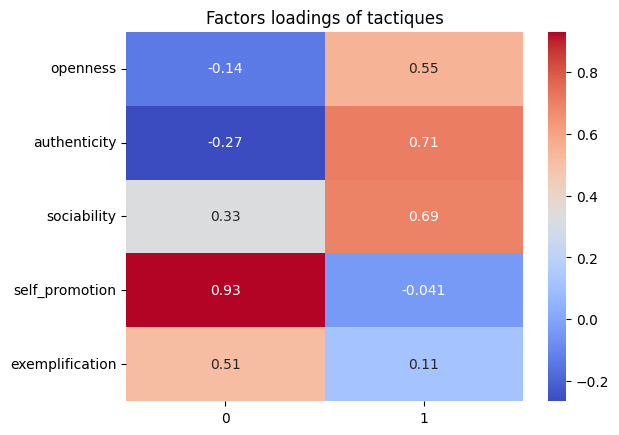

In [536]:
data=listings_zsc_tactics[cols_tactics]
fa = FactorAnalyzer(n_factors=2, rotation='oblimin', method='minres')
#斜交旋转（oblique），允许因子之间存在相关性。
##ml的要求是数据符合正态分布，样本量大于items数的10倍
fa.fit(data)

##LOADINGS :
loadings = fa.loadings_
loadings_df=pd.DataFrame(loadings, index=data.columns)
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Factors loadings of tactiques')
plt.show()


In [537]:
listings_zsc_tactics.to_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics9.csv', index=False)

## visualisation de cercle de corrélation :

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


Explained variance ratio:0.5637898254780599


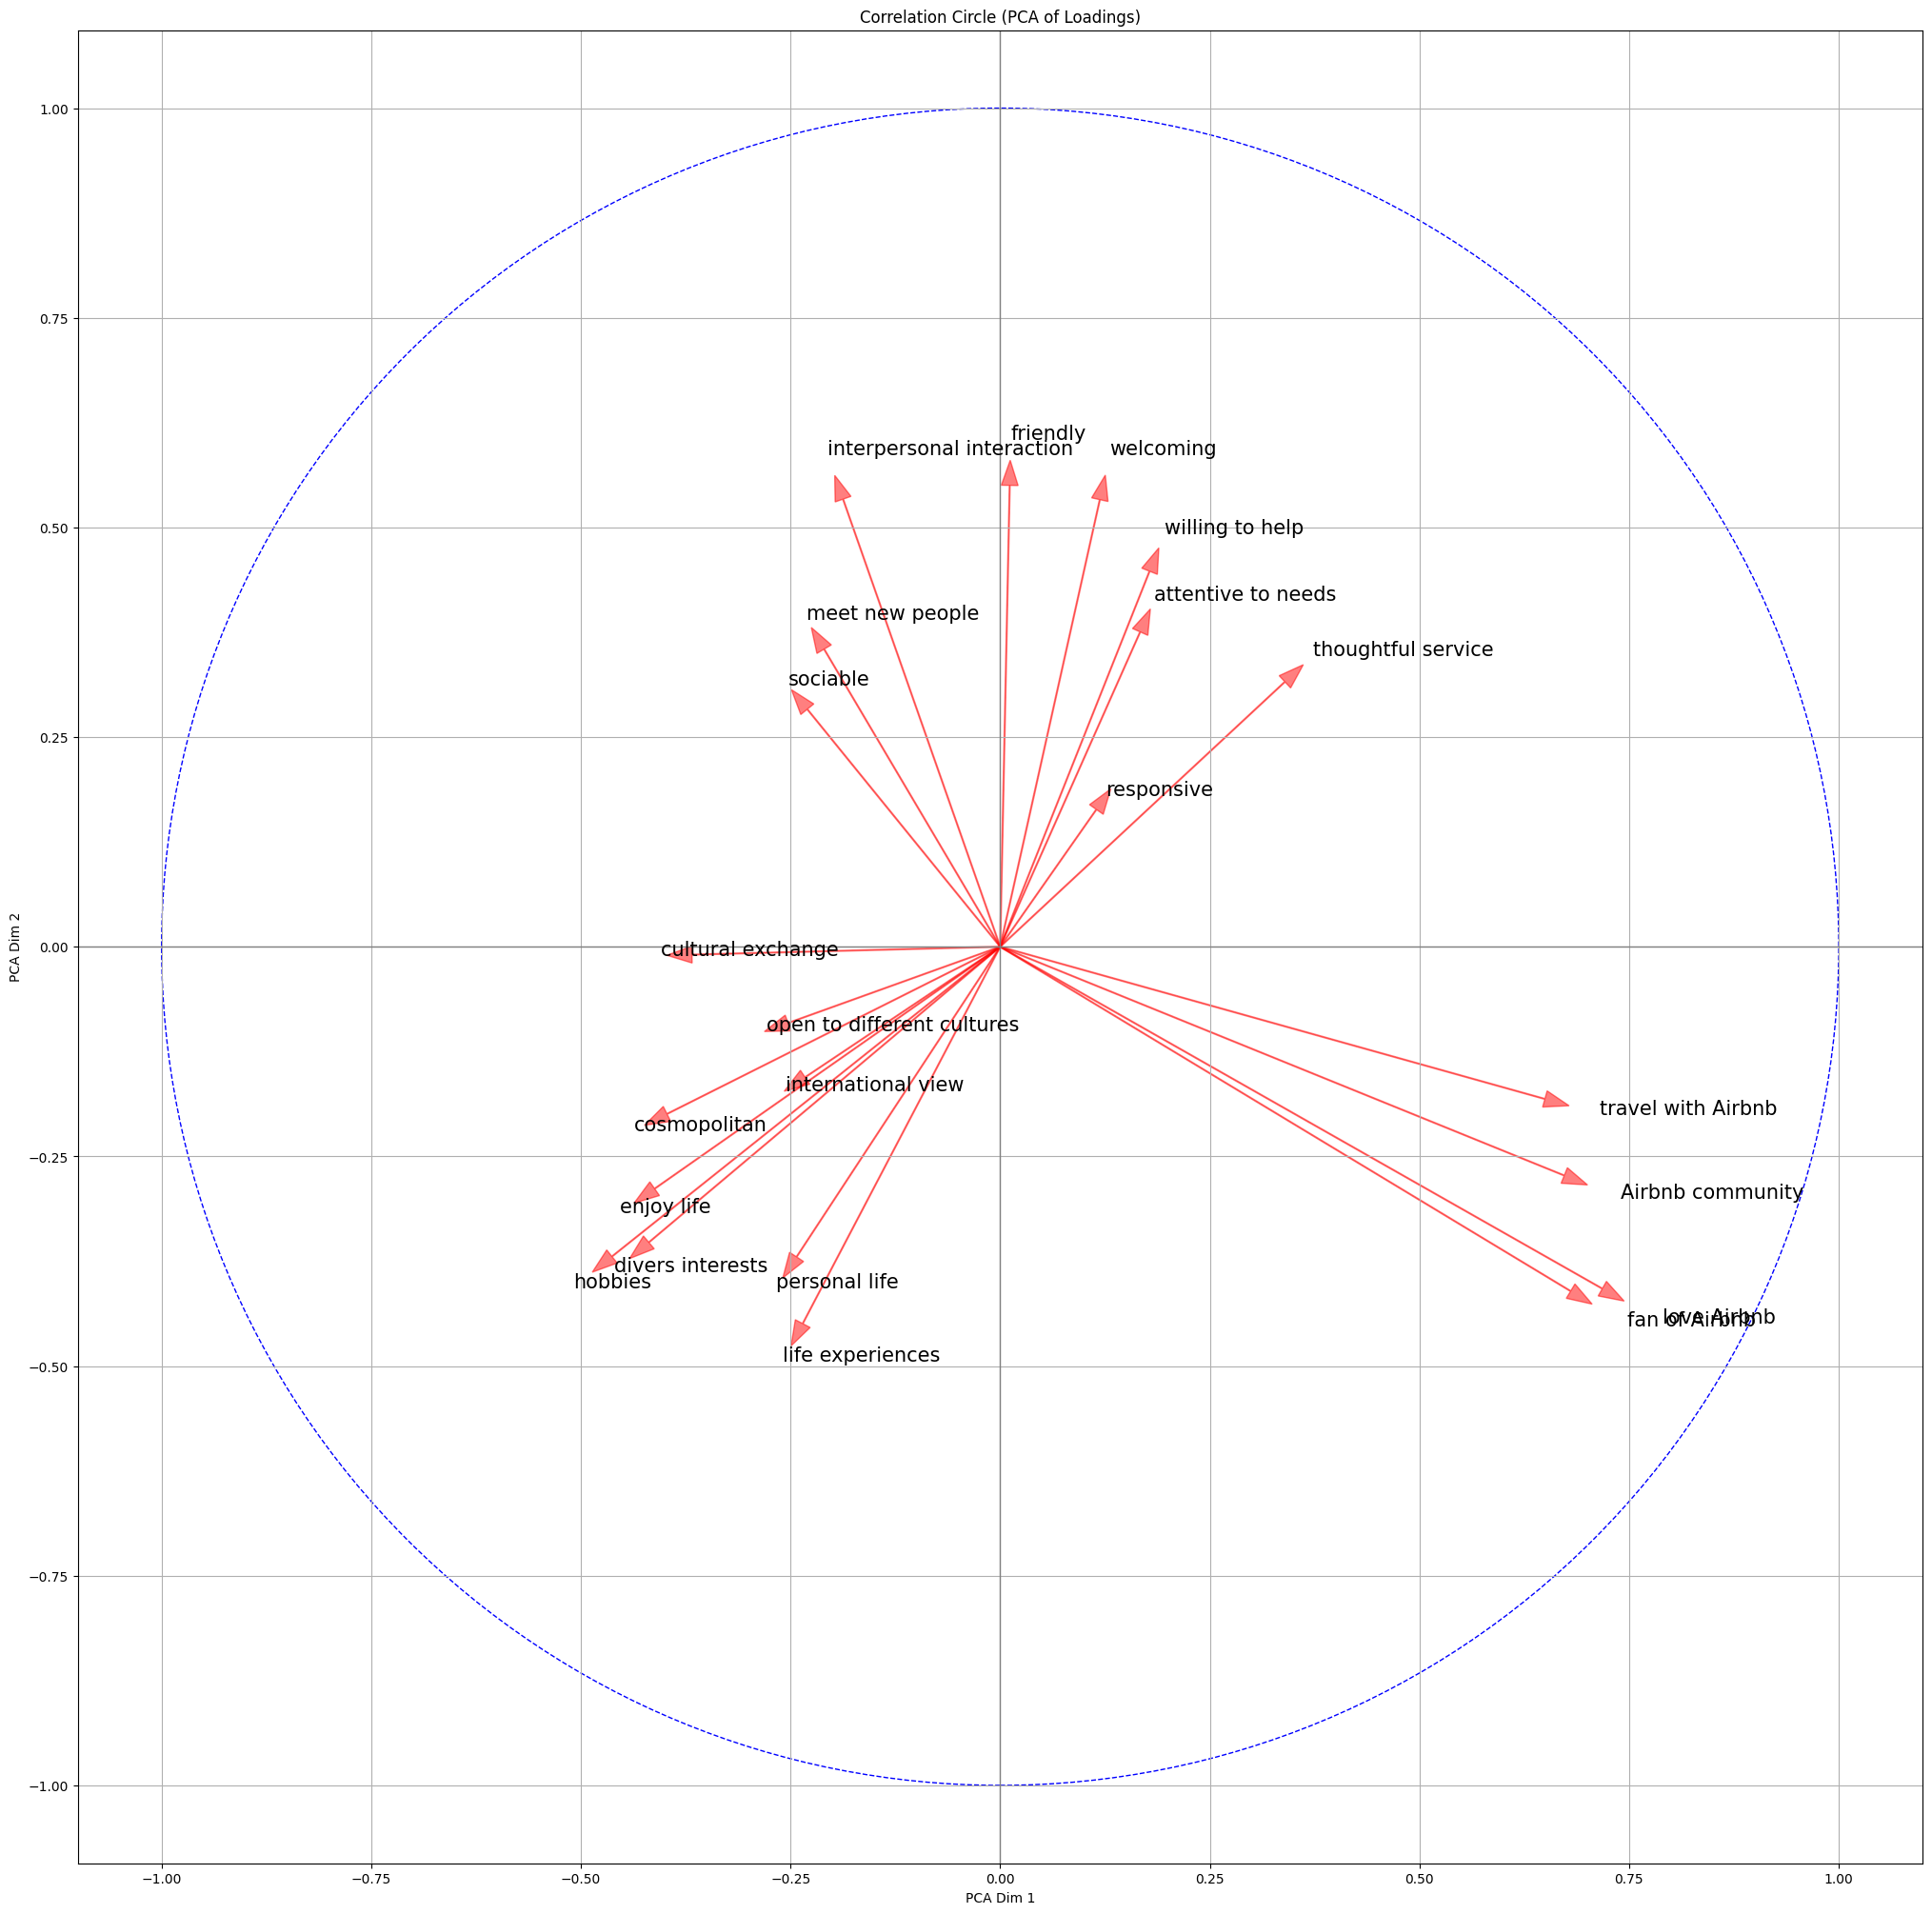

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca=PCA(n_components=2)
loadings_2d=pca.fit_transform(loadings)
print(f"Explained variance ratio:{pca.explained_variance_ratio_.sum()}")

plt.figure(figsize=(25, 25))
# 画单位圆
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# 坐标轴
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# PCA画箭头
for i, var in enumerate(data.columns):
    plt.arrow(0, 0, loadings_2d[i, 0], loadings_2d[i, 1], 
              color='red', alpha=0.5, head_width=0.02)
    plt.text(loadings_2d[i, 0]*1.1, loadings_2d[i, 1]*1.1, var, fontsize=15)


plt.xlabel('PCA Dim 1')
plt.ylabel('PCA Dim 2')
plt.title('Correlation Circle (PCA of Loadings)')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

Explained variance ratios (3D): 0.7795922661712739


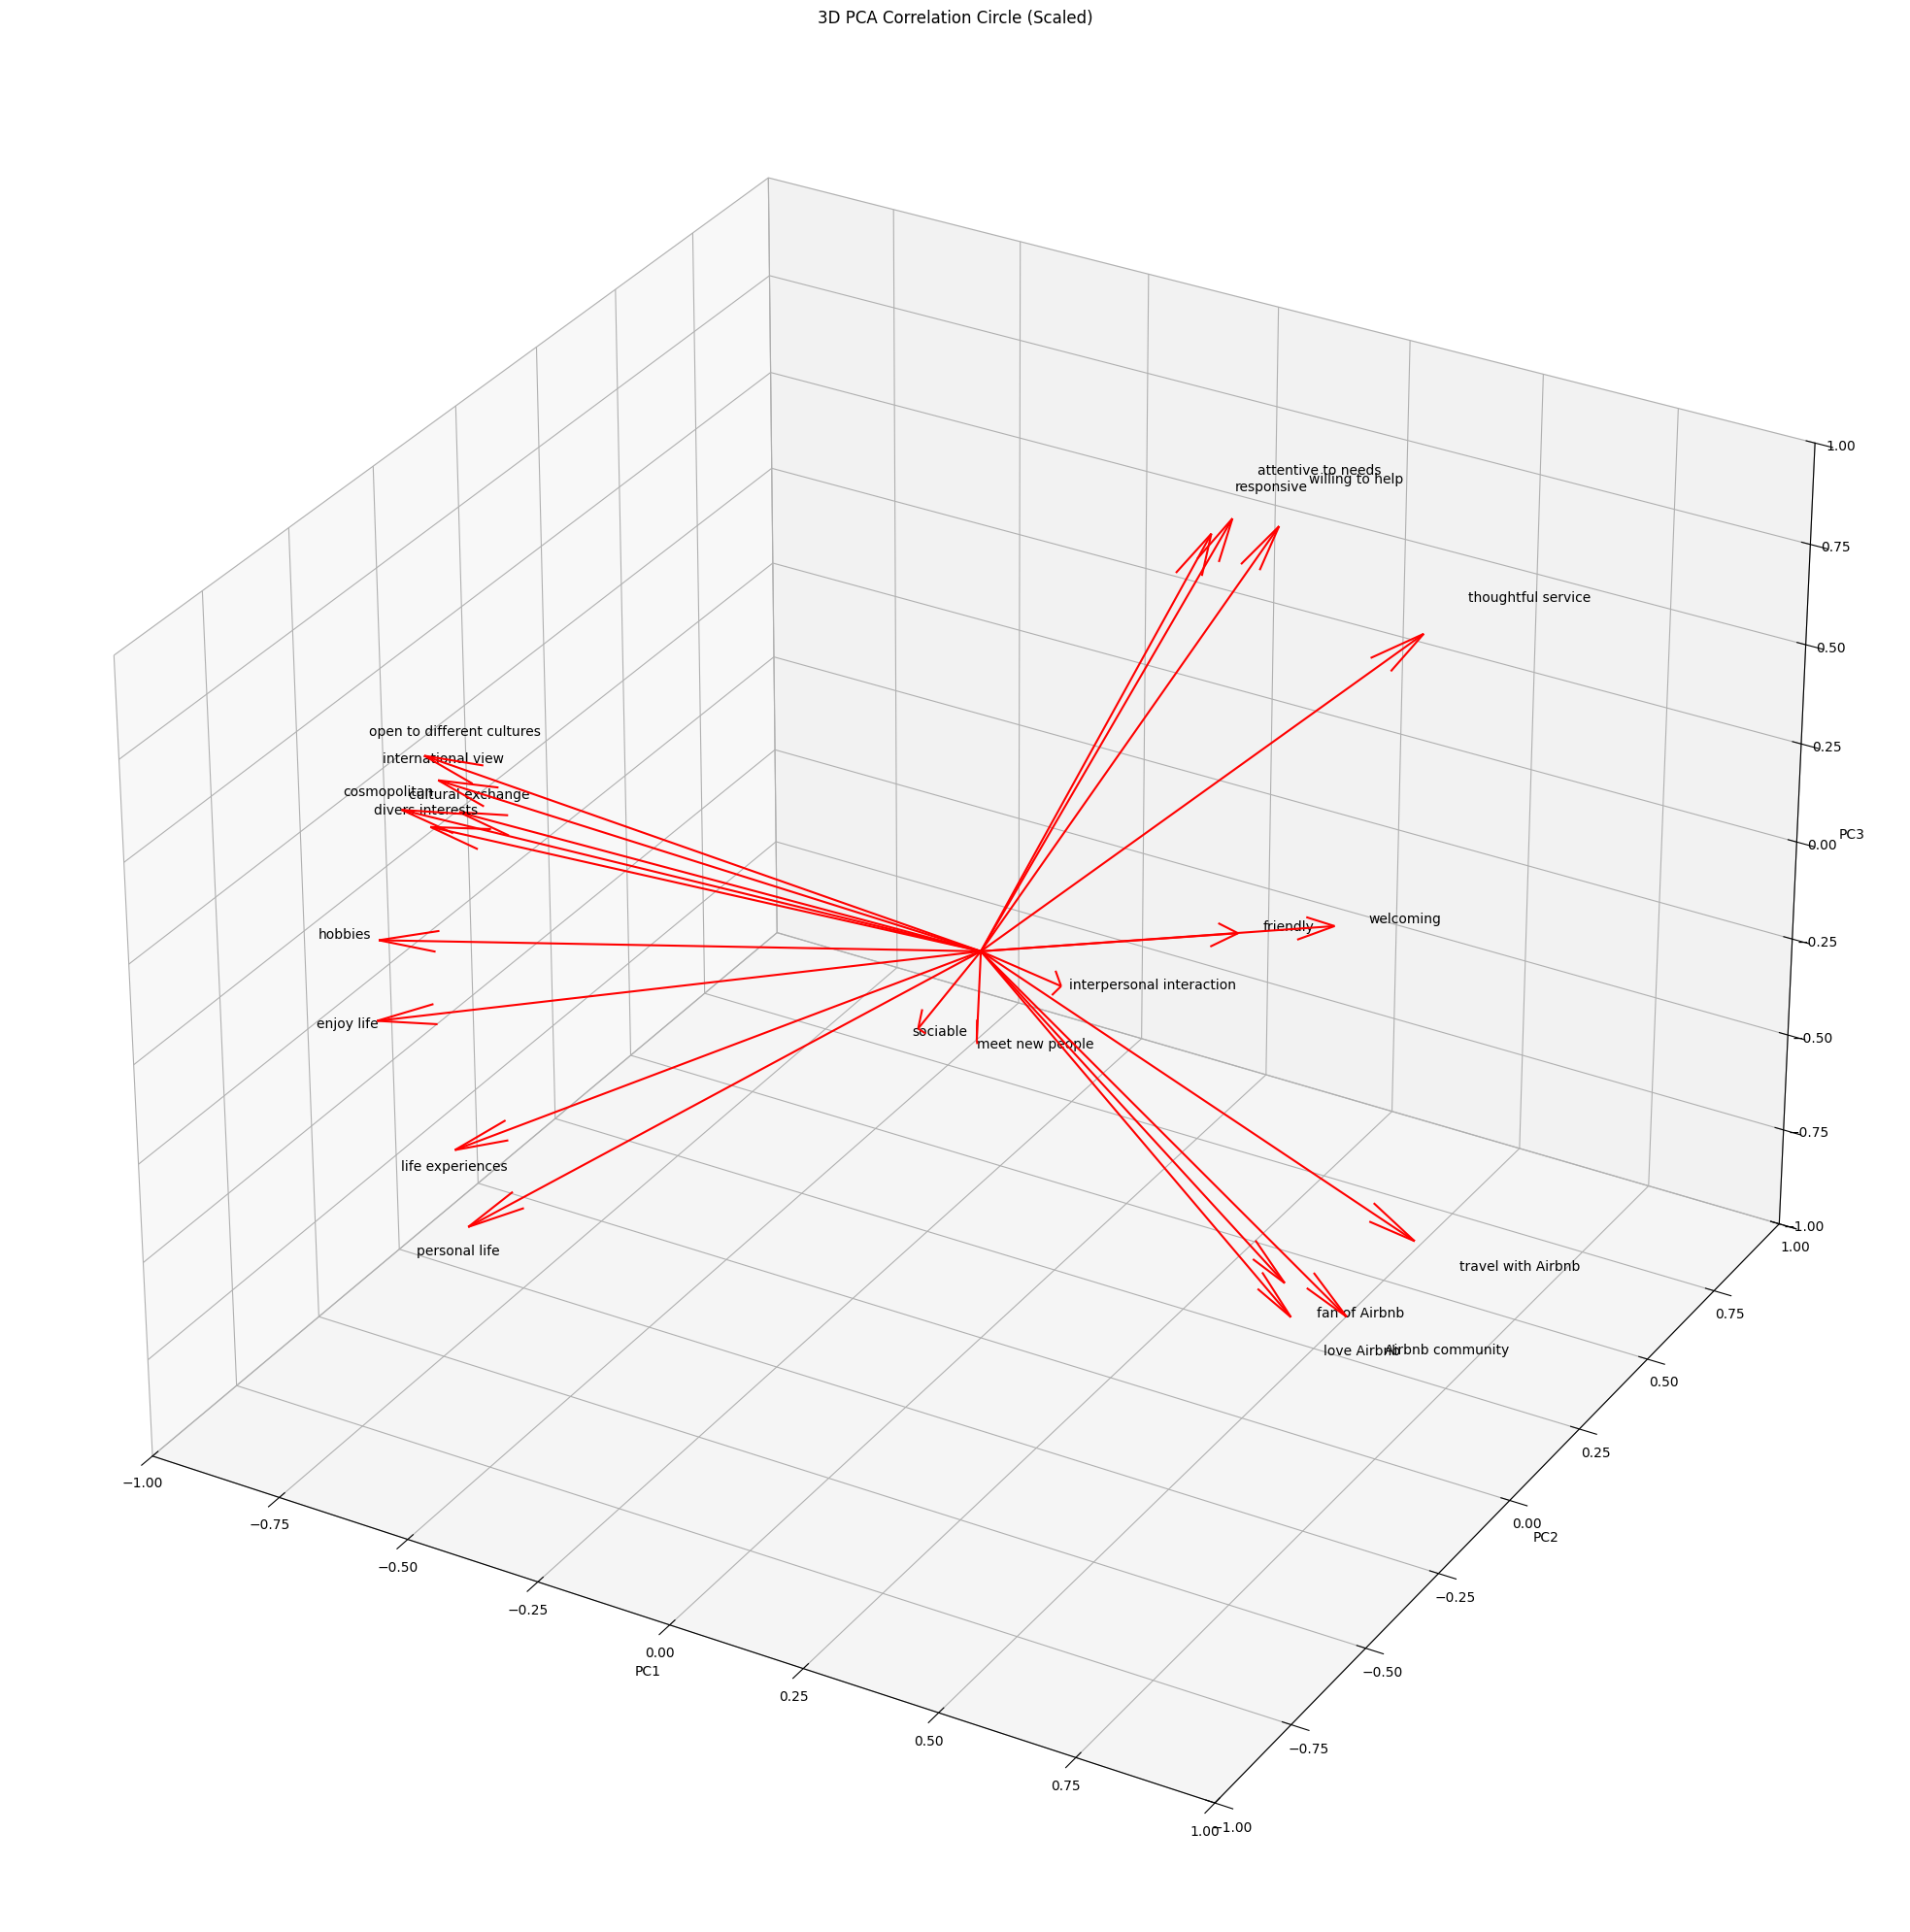

In [144]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_3d=PCA(n_components=3)
loadings_3d=pca_3d.fit_transform(loadings)



fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')


# 缩放向量
norms = np.linalg.norm(loadings_3d, axis=1)
loadings_3d_scaled = loadings_3d / norms[:, np.newaxis] #0.8
print("Explained variance ratios (3D):", pca_3d.explained_variance_ratio_.sum())


# 画箭头
for i, var in enumerate(data.columns):
    ax.quiver(0, 0, 0,
              loadings_3d_scaled[i, 0], 
              loadings_3d_scaled[i, 1], 
              loadings_3d_scaled[i, 2], 
              color='red', arrow_length_ratio=0.1)
    
    ax.text(loadings_3d_scaled[i, 0]*1.1, 
            loadings_3d_scaled[i, 1]*1.1, 
            loadings_3d_scaled[i, 2]*1.1, 
            var, fontsize=10)

# 坐标轴限制
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.title('3D PCA Correlation Circle (Scaled)')
plt.tight_layout()
plt.show()

## resultat des items et tactiques :

In [538]:
#sauvegarder les items et les tactiques：
cols_labels=['open to different cultures', 'cosmopolitan', 'international view','cultural exchange',
                       'personal life', 'life experiences','divers interests', 'hobbies', 'enjoy life', 
                    'meet new people', 'welcoming', 'friendly', 'sociable', 'interpersonal interaction',
                     'thoughtful service', 'attentive to needs', 'willing to help','responsive', 
                     'fan of Airbnb', 'Airbnb community', 'love Airbnb','travel with Airbnb']
cols_tactics=['openness', 'authenticity','sociability', 'self_promotion', 'exemplification']

labels2tac={
    "openness":['open to different cultures','cosmopolitan','international view','cultural exchange'], 
    "authenticity":['personal life','life experiences','divers interests','hobbies','enjoy life'], 
    'sociability':['meet new people', 'welcoming', 'friendly','sociable', 'interpersonal interaction',],
    'self_promotion':['thoughtful service', 'attentive to needs','willing to help','responsive'],
    'exemplification':["fan of Airbnb","Airbnb community",'love Airbnb', 'travel with Airbnb']    
}    


In [539]:
display(listings_zsc_tactics.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,responsive,fan of Airbnb,Airbnb community,love Airbnb,travel with Airbnb,openness,authenticity,sociability,self_promotion,exemplification
0,3109,https://www.airbnb.com/rooms/3109,20231212042736,2023-12-12,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,NaN,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,81106,https://www.airbnb.com/rooms/81106,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...,NaN,The neighborhood will show you an other side o...,https://a0.muscache.com/pictures/miso/Hosting-...,439130,...,0.639748,0.095682,0.017927,0.021362,0.258571,-0.489184,0.854365,-0.523210,0.592295,-0.312030
2,7397,https://www.airbnb.com/rooms/7397,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,0.380097,0.000321,0.043717,0.000308,0.001214,-1.128289,-1.102275,-2.010527,-1.188501,-0.649121
3,81615,https://www.airbnb.com/rooms/81615,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.74 · 1 bedroom · 1 b...,NaN,NaN,https://a0.muscache.com/pictures/2630947/9340f...,429406,...,0.456869,0.541627,0.886296,0.281512,0.185741,0.012635,0.472314,-0.853347,-0.359913,0.924683
4,86053,https://www.airbnb.com/rooms/86053,20231212042736,2023-12-13,city scrape,Rental unit in Paris · ★4.88 · 1 bedroom · 2 b...,NaN,The flat is situated in the very heart of Pari...,https://a0.muscache.com/pictures/1982057/f94cf...,296615,...,0.629929,0.021728,0.041303,0.071569,0.320359,0.077214,-0.632077,1.141877,1.614500,-0.293477


# OLS:

In [334]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
listings9=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics.csv', sep=',', on_bad_lines='skip', encoding='utf-8')
listings=listings9

In [543]:
## response_rate:
print(listings.host_response_rate.notna().value_counts()/len(listings),'\n')
print(listings.host_response_rate.describe(include='all'))
listings['host_response_rate']=listings['host_response_rate'].fillna(92.4)

host_response_rate
True     0.825742
False    0.174258
Name: count, dtype: float64 

count    30564.000000
mean        92.443725
std         19.746748
min          0.000000
25%         98.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64


In [544]:
listings['langue']=listings['langue'].fillna("vide")
# print(listings.langue.value_counts()/len(listings))#55 NAN

listings['langue_']=listings['langue'].apply(lambda x : x if x=='fr' or  x=='en' or x=='vide' else "other_lang")
print(listings.langue_.value_counts()/len(listings),'\n')

langue_
vide          0.550819
fr            0.249095
en            0.184795
other_lang    0.015292
Name: count, dtype: float64 



## vif :

In [545]:
from statsmodels.tools.tools import add_constant
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


formula=('booking_rate_l30d ~ C(langue_) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) +host_response_rate +'
' availability_30 + price_ + review_scores_rating + '
'C(host_location_category) + C(property_type_) + beds +bathrooms+ C(instant_bookable) + '
'len + openness +authenticity + sociability + self_promotion + exemplification ')

y, X = dmatrices(formula, data=listings, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df['Variables']=X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_df)

,Variables,VIF
0,Intercept,273.472408
1,C(langue_)[T.fr],2.333929
2,C(langue_)[T.other_lang],1.165966
3,C(langue_)[T.vide],2.745514
4,C(host_is_superhost)[T.t],1.120550
5,C(professional_host)[T.t],1.367046
6,C(host_identity_verified)[T.t],1.022849
7,C(host_has_profile_pic)[T.t],1.088330
8,C(host_location_category)[T.GB],1.197332
9,C(host_location_category)[T.Others],1.415938


## model basic:

In [546]:
model1=smf.ols('booking_rate_l30d ~ C(langue_) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) + host_response_rate +'
' availability_30 + price_ + review_scores_rating + '
'C(host_location_category) + C(property_type_) + beds +bathrooms+ C(instant_bookable) + '
'len + len_squared', data=listings).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     286.2
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        15:37:12   Log-Likelihood:                 8702.5
No. Observations:               37012   AIC:                        -1.736e+04
Df Residuals:                   36988   BIC:                        -1.715e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## ajouter des variables de tactiques :

In [ ]:
model2=smf.ols('booking_rate_l30d ~ C(langue_) + C(host_is_superhost) + C(professional_host) +'
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic) + host_response_rate +'
' availability_30 + price_ + review_scores_rating + '
'C(host_location_category) + C(property_type_) + beds +bathrooms+ C(instant_bookable) + '
'len + len_squared + openness + authenticity + sociability +self_promotion + exemplification', data=listings).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     236.5
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        15:37:16   Log-Likelihood:                 8719.8
No. Observations:               37012   AIC:                        -1.738e+04
Df Residuals:                   36983   BIC:                        -1.713e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## modèle avec interaction: 

host_is_superhost
f    0.791052
t    0.208948
Name: count, dtype: float64


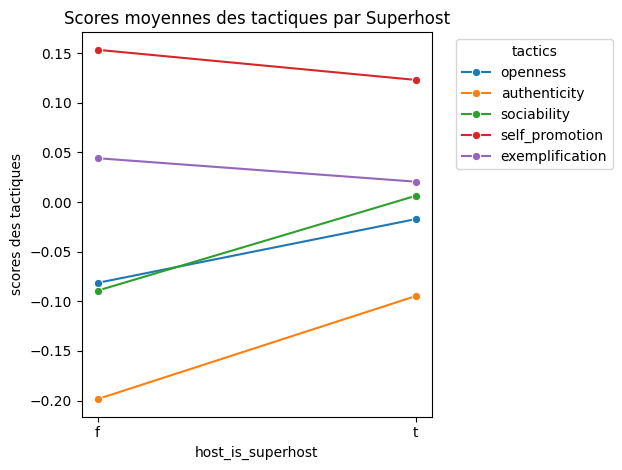

In [551]:
import seaborn as sns
data=listings
print(data.host_is_superhost.value_counts()/len(data))#*

means = data.groupby('host_is_superhost')[cols_tactics].mean().reset_index()#*

means_long = means.melt(id_vars='host_is_superhost', #*
                        value_vars=cols_tactics, 
                        var_name='tactics', 
                        value_name='mean_score')

# plt.figure(figsize=(10, 6))
sns.lineplot(data=means_long, x='host_is_superhost', y='mean_score', hue='tactics', marker='o')#*

plt.title('Scores moyennes des tactiques par Superhost')#*
plt.xlabel('host_is_superhost')#*
plt.ylabel('scores des tactiques')

plt.legend(title='tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [552]:
model3=smf.ols('booking_rate_l30d ~ C(langue_) + C(professional_host) + '
' yrs_experience + C(host_identity_verified)+ C(host_has_profile_pic)+ host_response_rate+'
' availability_30 + price_ + review_scores_rating+'
'C(host_location_category) + C(property_type_) + beds +bathrooms + C(instant_bookable)+'
'len + len_squared +  '
'C(host_is_superhost)*(openness + authenticity + sociability +self_promotion + exemplification )', data=listings).fit(cov_type="HC3")

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:      booking_rate_l30d   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 11 May 2025   Prob (F-statistic):               0.00
Time:                        15:38:34   Log-Likelihood:                 8733.4
No. Observations:               37012   AIC:                        -1.740e+04
Df Residuals:                   36978   BIC:                        -1.711e+04
Df Model:                          33                                         
Covariance Type:                  HC3                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [554]:
## test de combinaison linéaire
print(model3.t_test("openness + C(host_is_superhost)[T.t]:openness = 0"))
print(model3.t_test("authenticity + C(host_is_superhost)[T.t]:authenticity = 0"))
print(model3.t_test("sociability + C(host_is_superhost)[T.t]:sociability = 0"))

print(model3.t_test("self_promotion + C(host_is_superhost)[T.t]:self_promotion = 0"))
print(model3.t_test("exemplification + C(host_is_superhost)[T.t]:exemplification = 0"))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0096      0.005     -1.977      0.048      -0.019   -8.18e-05
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0017      0.005     -0.365      0.715      -0.011       0.008
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0065      0.005      1.364      0.172      -0.003       0.016
                             Test for Constraints   

### interaction plot:

In [555]:
def interaction_plot_advanced(tactic='openness', listings_=listings, mediator='host_is_superhost'):
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf

    # 数据准备
    listings = listings_.copy()
    listings[mediator] = listings[mediator].map({'f': 0, 't': 1})

    # 1. 拟合完整模型（和你model3一致）
    formula = ('booking_rate_l30d ~ C(langue_) + C(professional_host) + '
               'yrs_experience + C(host_identity_verified) + C(host_has_profile_pic) + host_response_rate + '
               'availability_30 + price_ + review_scores_rating + '
               'C(host_location_category) + C(property_type_) + beds + bathrooms + C(instant_bookable) + '
               'C(host_is_superhost)*(openness + authenticity + sociability + self_promotion + exemplification)')
    
    model = smf.ols(formula, data=listings).fit(cov_type="HC3")

    # 2. 构建预测数据
    tactic_range = np.linspace(listings[tactic].min(), listings[tactic].max(), 100)
    groups = [0, 1]  # 非superhost / superhost

    # 提取控制变量的“默认值”：数值型取均值，分类型取众数
    default_vals = {}
    for col in model.model.exog_names:
        if ':' in col or col == 'Intercept':
            continue
        var_name = col.split('[')[0].replace('C(', '').replace(')', '')
        if var_name in listings.columns:
            if listings[var_name].dtype == 'O' or listings[var_name].nunique() < 10:
                default_vals[var_name] = listings[var_name].mode()[0]
            else:
                default_vals[var_name] = listings[var_name].mean()

    # 只保留 formula 中真正的变量
    import re
    vars_in_formula = re.findall(r'[a-zA-Z_][a-zA-Z0-9_]*', formula)
    default_vals = {k: v for k, v in default_vals.items() if k in vars_in_formula}
    
    # 构造用于预测的数据框
    rows = []
    for g in groups:
        for val in tactic_range:
            row = default_vals.copy()
            row[tactic] = val
            row[mediator] = g
            rows.append(row)

    predict_df = pd.DataFrame(rows)

    # predict 时注意处理分类变量（和原数据保持一致）
    for col in predict_df.columns:
        if col in listings.columns and listings[col].dtype == 'O':
            predict_df[col] = predict_df[col].astype(listings[col].dtype)

    # 预测结果
    predict_df['predicted_booking_rate'] = model.predict(predict_df)

    # 加入置信区间
    preds = model.get_prediction(predict_df)
    pred_summary = preds.summary_frame(alpha=0.05)
    predict_df['ci_lower'] = pred_summary['mean_ci_lower']
    predict_df['ci_upper'] = pred_summary['mean_ci_upper']

    # 可视化
    plt.figure(figsize=(8, 6))
    for g in groups:
        group_df = predict_df[predict_df[mediator] == g]
        label = f'Superhost' if g == 1 else f'Non-superhost'
        plt.plot(group_df[tactic], group_df['predicted_booking_rate'], label=label)
        plt.fill_between(group_df[tactic], group_df['ci_lower'], group_df['ci_upper'], alpha=0.2)

    plt.xlabel(f'{tactic}')
    plt.ylabel('Taux de réservation prédit')
    plt.title(f"Figure d'interaction : {tactic} × {mediator} ")
    plt.legend()
    plt.tight_layout()
    # plt.show()



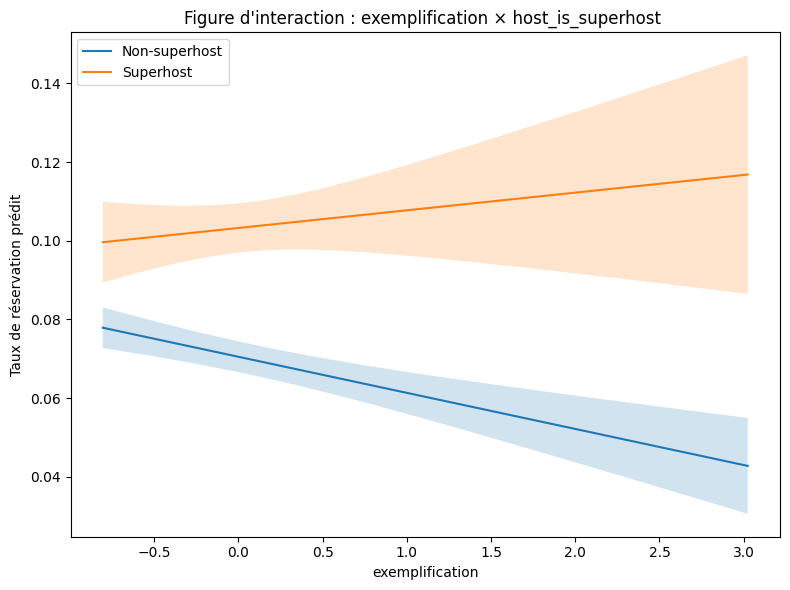

In [556]:
interaction_plot_advanced(tactic='exemplification')


In [557]:
## taille d'effet : cohen's d :
# 计算组间实际差异：小效应：0.2, 中等效应：0.5, 大效应：0.8

import numpy as np
from scipy import stats

def t_test(x,y,tactic):
    t_stat, p_val = stats.ttest_ind(x[tactic], y[tactic],equal_var=False)
    return t_stat, p_val

def cohens_d(x, y,tactic):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.std(x[tactic], ddof=1) ** 2 + (ny - 1) * np.std(y[tactic], ddof=1) ** 2) / (nx + ny - 2))
    return (np.mean(x[tactic]) - np.mean(y[tactic])) / pooled_std



##GROUPED data:
data = listings[listings['host_is_superhost'] == 't']#*
data_ =listings[listings['host_is_superhost'] == 'f']#*

results = []
for tactic in cols_tactics:
    t_stat, p_val = t_test(data, data_, tactic)
    d = cohens_d(data, data_, tactic)
    mean1 = data[tactic].mean()
    mean2 = data_[tactic].mean()
    
    results.append({
        'Tactique': tactic,
        'Superhost (Mean)': mean1,
        'Non-Superhost (Mean)': mean2,
        "Cohen's d": round(d, 2),
        't': round(t_stat, 2),
        'p': round(p_val, 4),

    })

# 输出为 DataFrame
df_results = pd.DataFrame(results)
display(df_results)

,Tactique,Superhost (Mean),Non-Superhost (Mean),Cohen's d,t,p
0,openness,-0.017183,-0.081420,0.10,7.69,0.0000
1,authenticity,-0.094665,-0.198449,0.15,11.39,0.0000
2,sociability,0.006288,-0.089234,0.14,10.92,0.0000
3,self_promotion,0.122951,0.153281,-0.04,-3.36,0.0008
4,exemplification,0.020487,0.044127,-0.04,-2.80,0.0051


# sauvegarder le résultat:

In [558]:
from statsmodels.iolib.summary2 import summary_col

results_table = summary_col([model1, model2, model3],
                            stars=True, 
                            float_format='%0.3f',
                            model_names=['Basic','Tactique','Superhôte'],
                            info_dict={'N': lambda x: f"{int(x.nobs)}",
                                       'R²': lambda x: f"{x.rsquared:.2f}"})

print(results_table)


                                            Basic    Tactique Superhôte
-----------------------------------------------------------------------
Intercept                                 0.116***  0.120***  0.121*** 
                                          (0.017)   (0.017)   (0.013)  
C(langue_)[T.fr]                          0.009***  0.009**   0.009**  
                                          (0.003)   (0.004)   (0.004)  
C(langue_)[T.other_lang]                  0.012     0.012     0.012    
                                          (0.009)   (0.009)   (0.008)  
C(langue_)[T.vide]                        0.009**   0.008**   0.007*   
                                          (0.004)   (0.004)   (0.004)  
C(host_is_superhost)[T.t]                 0.034***  0.033***  0.033*** 
                                          (0.003)   (0.003)   (0.003)  
C(professional_host)[T.t]                 0.015***  0.017***  0.017*** 
                                          (0.002)   (0.002)   (